## Mean/ Median imputation

This can obviously only be applied on numerical variables.

- If the variable is skewed, median is better.
- If the variable is normally distributed, both mean and median can be used as they are approximately the same.

### Assumptions:

- Data is missing completely at random (MCAR)
- No more than 5% of the variable contains missing data

### Important:

- The imputation values should be calculated (learned) from the training set, the calculated values should then be used to impute (or transform) the test set. This is to avoid data leakage (lead to overfitting).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Titanic

In [4]:
data = pd.read_csv("../data/titanic.csv", usecols=["age", "fare", "survived"])
data.head()

,survived,age,fare
0,1,29.0000,211.3375
1,1,0.9167,151.5500
2,0,2.0000,151.5500
3,0,30.0000,151.5500
4,0,25.0000,151.5500


In [5]:
# Check the fraction of NA
data.isna().mean()

survived    0.000000
age         0.200917
fare        0.000764
dtype: float64

In [6]:
# Separate data in to train/ test sets before imputing
X_train, X_test, y_train, y_test = train_test_split(
    data[["age", "fare"]],
    data["survived"],
    test_size=0.5,
    random_state=44
)

X_train.shape, X_test.shape

((654, 2), (655, 2))

In [7]:
# The percentage of NA should be fairly similar to those observed in the whole dataset.
X_train.isna().mean()

age     0.191131
fare    0.000000
dtype: float64

In [ ]:
# calculate the median of age
median = X_train["age"].median()
median

np.float64(28.0)

In [12]:
# calculate the mean of age
mean = X_train["age"].mean()
mean = np.round(mean, 1)
mean

np.float64(29.8)

In [13]:
# create new variable with the missing values
# replaced using mean and median
X_train["age_median"] = X_train["age"].fillna(median)
X_train["age_mean"] = X_train["age"].fillna(mean)
X_train.head(10)

,age,fare,age_median,age_mean
1265,10.0,24.1500,10.0,10.0
77,37.0,83.1583,37.0,37.0
1042,NaN,15.5000,28.0,29.8
1308,29.0,7.8750,29.0,29.0
894,4.0,11.1333,4.0,4.0
191,30.0,45.5000,30.0,30.0
962,NaN,15.5000,28.0,29.8
1144,2.0,29.1250,2.0,2.0
659,5.0,19.2583,5.0,5.0
251,21.0,262.3750,21.0,21.0


In [15]:
# See how the variance get changed after mean/ median imputation
# There should be expected, as there are ~20% of missing data in 'age'

print("Original variable variance: ", X_train["age"].var())
print("Variance after median imputation: ", X_train["age_median"].var())
print("Variance after mean imputation: ", X_train["age_mean"].var())

Original variable variance:  197.42373190640302
Variance after median imputation:  160.1113771113708
Variance after mean imputation:  159.63230732759234


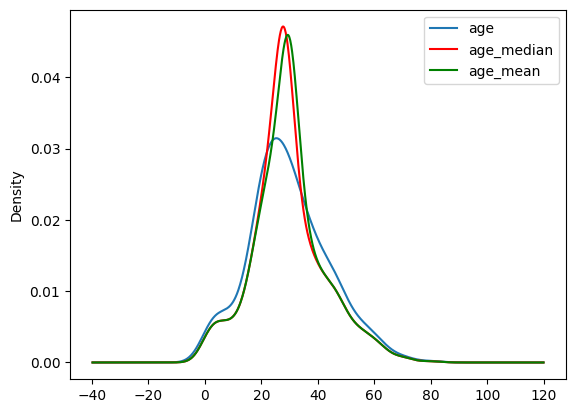

In [16]:
# The distribution has changed
# More values towards the median or mean

fig, ax = plt.subplots()
X_train["age"].plot(kind="kde", ax=ax)
X_train["age_median"].plot(kind="kde", ax=ax, color="red")
X_train["age_mean"].plot(kind="kde", ax=ax, color="green")
ax.legend()
plt.show()

#### The changed of variable distribution may affect its relationship with the target, which is importante for linear models. Therefore, our imputaion might negatively affect the linear models' performance.

#### Imputation using mean/ median may lead inliers to look like outliers.
#### In other words, may lead to an increase in the number of detected outliers.

<Axes: >

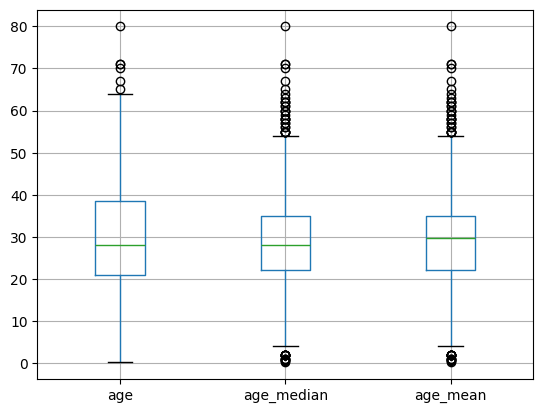

In [17]:
X_train[["age", "age_median", "age_mean"]].boxplot()